In [ ]:
!pip install ultralytics roboflow -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 702.8/702.8 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.0/70.0 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lid

In [ ]:
import os
from ultralytics import YOLO
from IPython.display import display, Image
!yolo checks

Ultralytics YOLOv8.1.5 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.5/78.2 GB disk)

OS                  Linux-6.1.58+-x86_64-with-glibc2.35
Environment         Colab
Python              3.10.12
Install             pip
RAM                 12.67 GB
CPU                 Intel Xeon 2.00GHz
CUDA                12.1

matplotlib          ✅ 3.7.1>=3.3.0
numpy               ✅ 1.23.5>=1.22.2
opencv-python       ✅ 4.8.0.76>=4.6.0
pillow              ✅ 9.4.0>=7.1.2
pyyaml              ✅ 6.0.1>=5.3.1
requests            ✅ 2.31.0>=2.23.0
scipy               ✅ 1.11.4>=1.4.1
torch               ✅ 2.1.0+cu121>=1.8.0
torchvision         ✅ 0.16.0+cu121>=0.9.0
tqdm                ✅ 4.66.1>=4.64.0
psutil              ✅ 5.9.5
py-cpuinfo          ✅ 9.0.0
thop                ✅ 0.1.1-2209072238>=0.1.1
pandas              ✅ 1.5.3>=1.1.4
seaborn             ✅ 0.13.1>=0.11.0


In [ ]:
%pwd "./datasets"

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="nAD7Tl6AbKJueOFIcaqN")
project = rf.workspace("national-university-of-sciences-and-technology-nust").project("ui-components-detection")
dataset = project.version(5)#.download("yolov8")
# project = rf.workspace("Y").project("ui-components-detection")

loading Roboflow workspace...
loading Roboflow project...


In [ ]:
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source="https://imagekit.io/blog/content/images/2019/12/image-optimization.jpg"

100% 6.23M/6.23M [00:00<00:00, 127MB/s]
Ultralytics YOLOv8.1.5 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

100% 77.6k/77.6k [00:00<00:00, 6.58MB/s]
image 1/1 /content/image-optimization.jpg: 448x640 1 person, 1 cup, 1 tv, 1 laptop, 1 mouse, 1 cell phone, 231.9ms
Speed: 3.5ms preprocess, 231.9ms inference, 1100.4ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


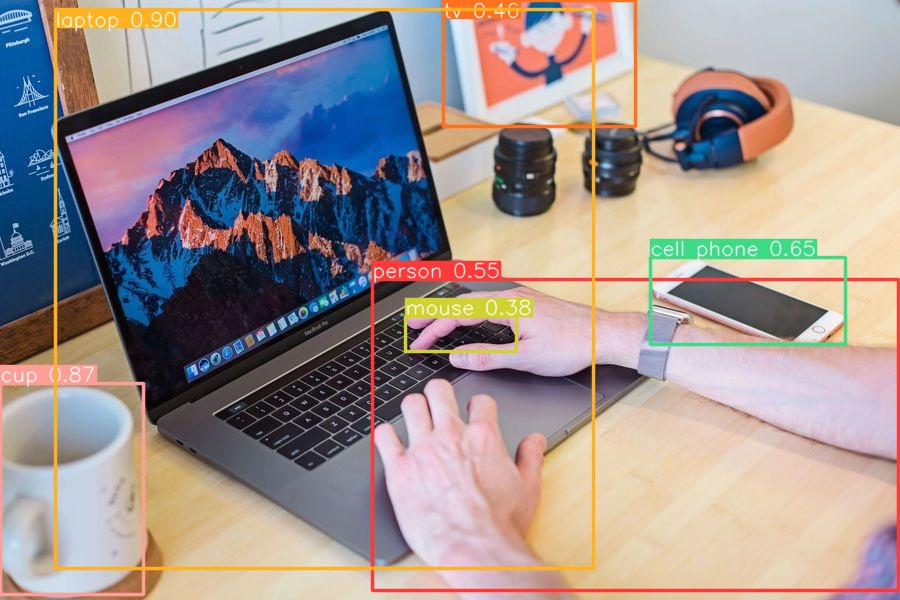

In [ ]:
Image(filename="./runs/detect/predict/image-optimization.jpg", height=400)

In [ ]:
!yolo task=detect mode=train model=yolov8n.pt data="data.yaml" epochs=50 imgsz=800

Ultralytics YOLOv8.1.5 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=data.yaml, epochs=50, time=None, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_wi

In [ ]:
!ls ./runs/detect/train/

args.yaml					    R_curve.png		 val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		 val_batch0_pred.jpg
confusion_matrix.png				    results.png		 val_batch1_labels.jpg
events.out.tfevents.1706102844.ef6543bf0c6a.1714.0  train_batch0.jpg	 val_batch1_pred.jpg
F1_curve.png					    train_batch1.jpg	 val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch2.jpg	 val_batch2_pred.jpg
labels.jpg					    train_batch3720.jpg  weights
P_curve.png					    train_batch3721.jpg
PR_curve.png					    train_batch3722.jpg


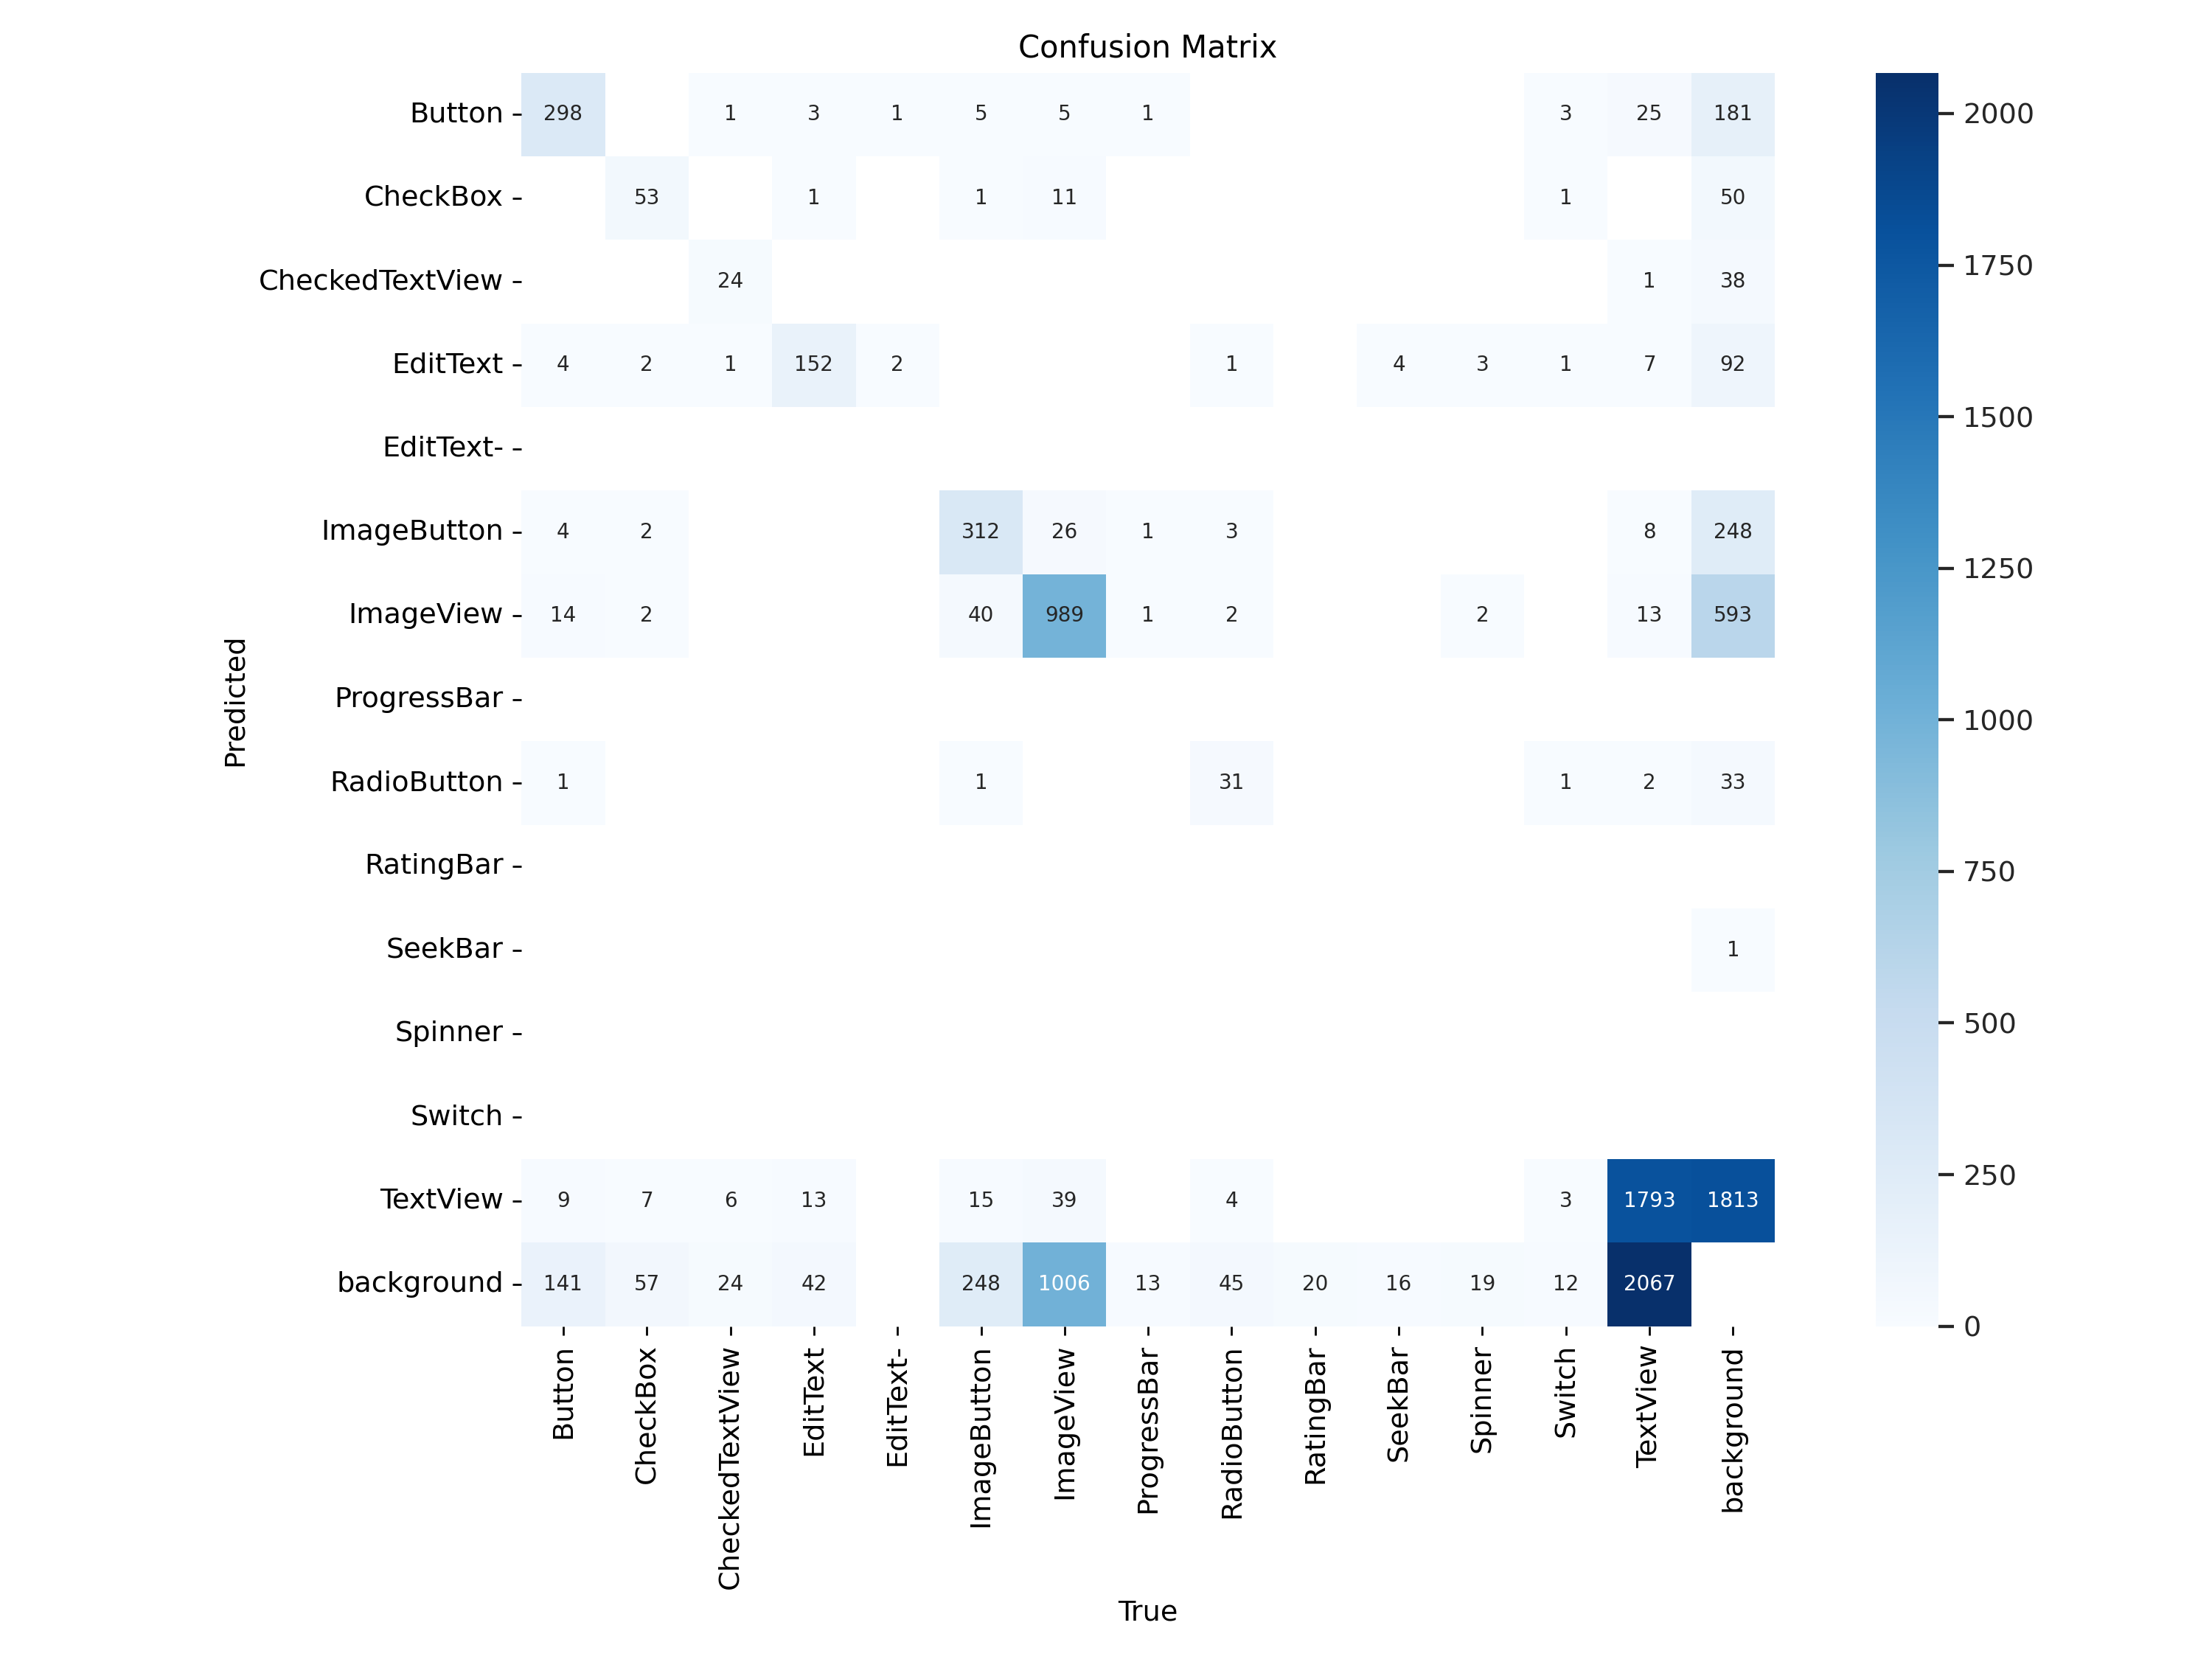

In [ ]:
Image(filename="./runs/detect/train/confusion_matrix.png", height=500)

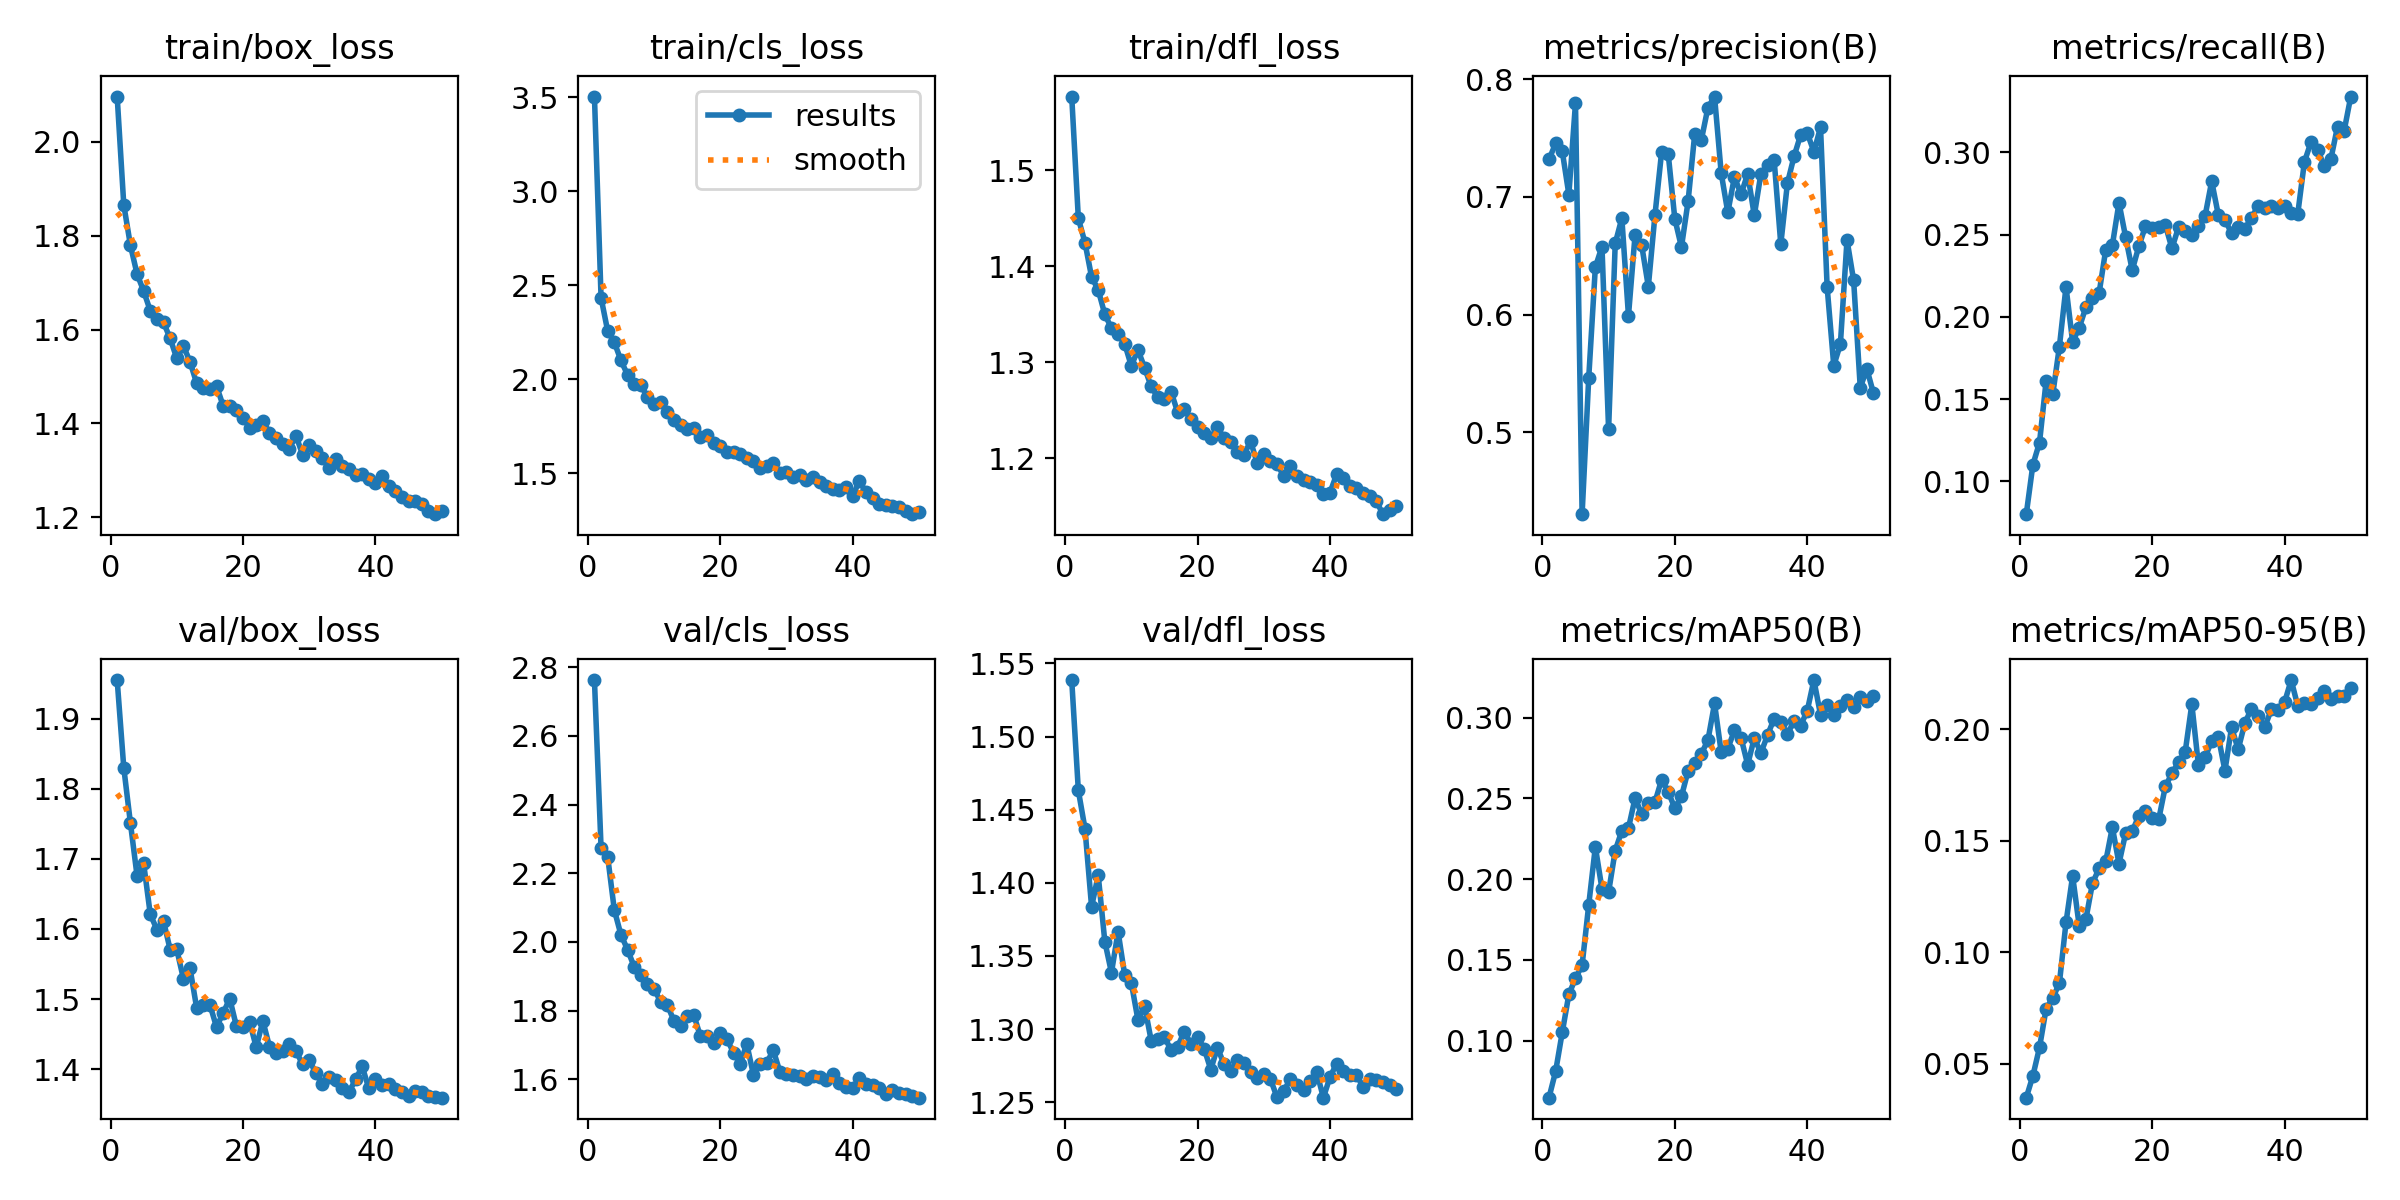

In [ ]:
Image(filename="./runs/detect/train/results.png", height=500)

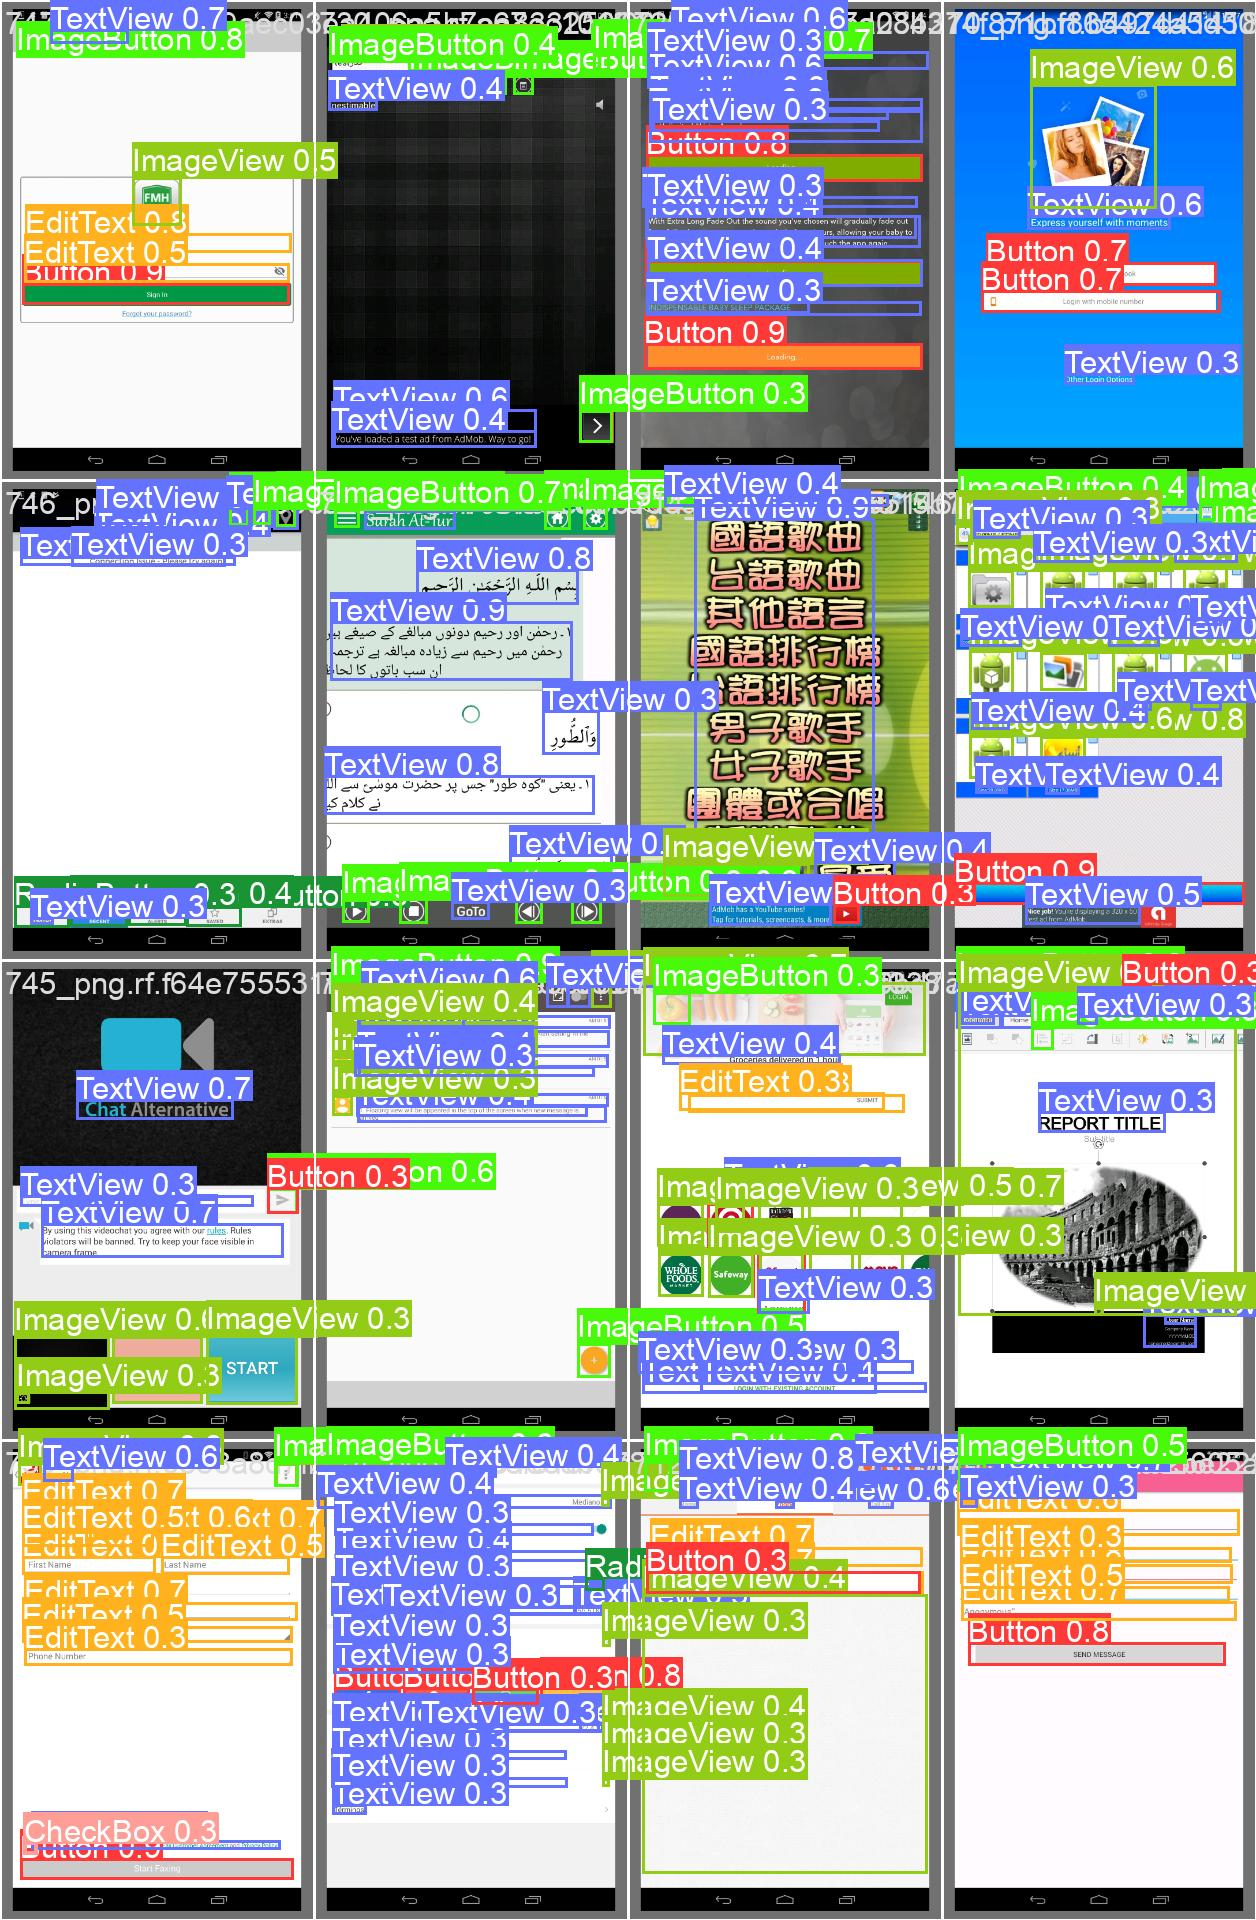

In [ ]:
Image(filename="./runs/detect/train/val_batch1_pred.jpg",height=600)

In [ ]:
!yolo task=detect mode=val model=runs/detect/train/weights/best.pt data="data.yaml"

Ultralytics YOLOv8.1.5 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3008378 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/datasets/UI-Components-Detection-5/valid/labels.cache... 425 images, 0 backgrounds, 0 corrupt: 100% 425/425 [00:00<?, ?it/s]
val: WARNING ⚠️ /content/datasets/UI-Components-Detection-5/valid/images/1019_png.rf.fea3a0004718a680308aacae4ed5ac45.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/datasets/UI-Components-Detection-5/valid/images/1065_png.rf.b6a7b1ed765321996eed4755e9f0de02.jpg: 7 duplicate labels removed
val: WARNING ⚠️ /content/datasets/UI-Components-Detection-5/valid/images/1096_png.rf.be2affe4f3121bc02983de3e396d9e26.jpg: 43 duplicate labels removed
val: WARNING ⚠️ /content/datasets/UI-Components-Detection-5/valid/images/149_png.rf.8ab5782ca850321bc82af2bd61601a4d.jpg: 15 duplicate labels removed
val: WARNING ⚠️ /content/datasets/UI-Components-Detection-5/valid/images/164_png.rf.44

In [ ]:
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt conf=0.5 source="Menu.png"
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt conf=0.25 source="Sign In Page.png"
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt conf=0.25 source="Sign Up Page.png"
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt conf=0.25 source="Splash Screen.png"

Ultralytics YOLOv8.1.5 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3008378 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/Sign In Page.png: 800x384 2 Buttons, 2 EditTexts, 4 ImageViews, 2 TextViews, 99.2ms
Speed: 3.6ms preprocess, 99.2ms inference, 564.6ms postprocess per image at shape (1, 3, 800, 384)
Results saved to runs/detect/predict3
💡 Learn more at https://docs.ultralytics.com/modes/predict
Ultralytics YOLOv8.1.5 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3008378 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/Sign Up Page.png: 800x384 3 Buttons, 3 EditTexts, 3 ImageViews, 1 TextView, 199.2ms
Speed: 10.1ms preprocess, 199.2ms inference, 925.8ms postprocess per image at shape (1, 3, 800, 384)
Results saved to runs/detect/predict4
💡 Learn more at https://docs.ultralytics.com/modes/predict
Ultralytics YOLOv8.1.5 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Te

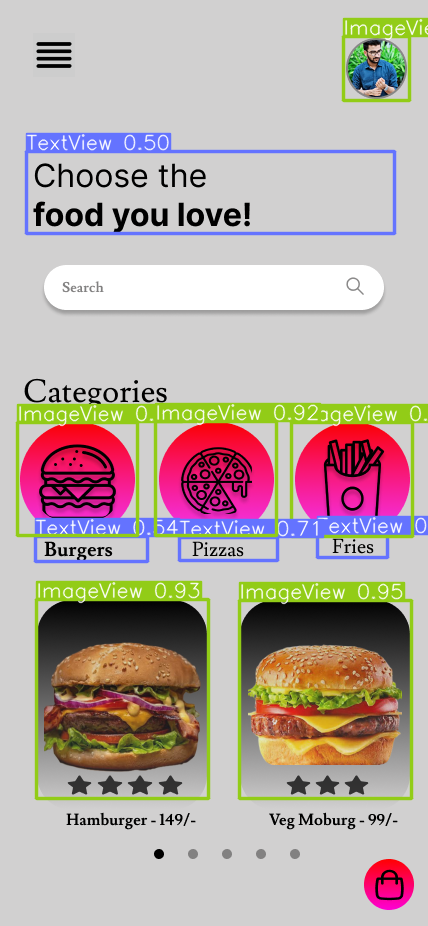

In [ ]:
Image(filename="./runs/detect/predict2/Menu.png", height=600)

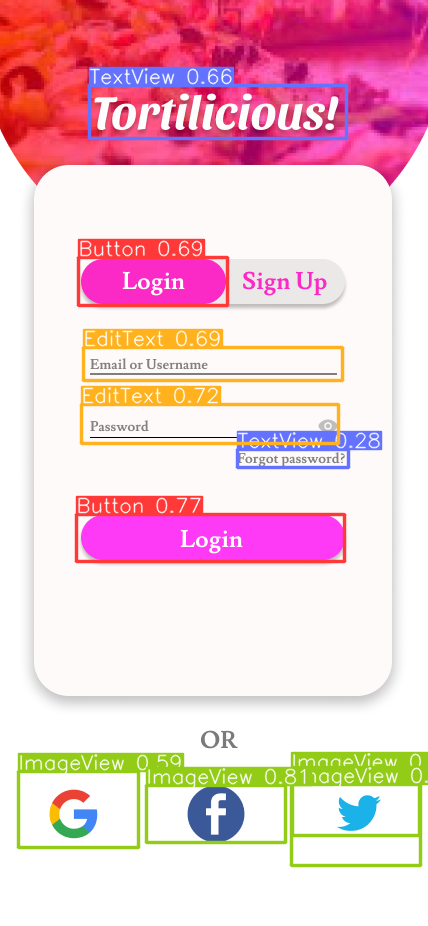

In [ ]:
Image(filename="./runs/detect/predict3/Sign In Page.png", height=600)

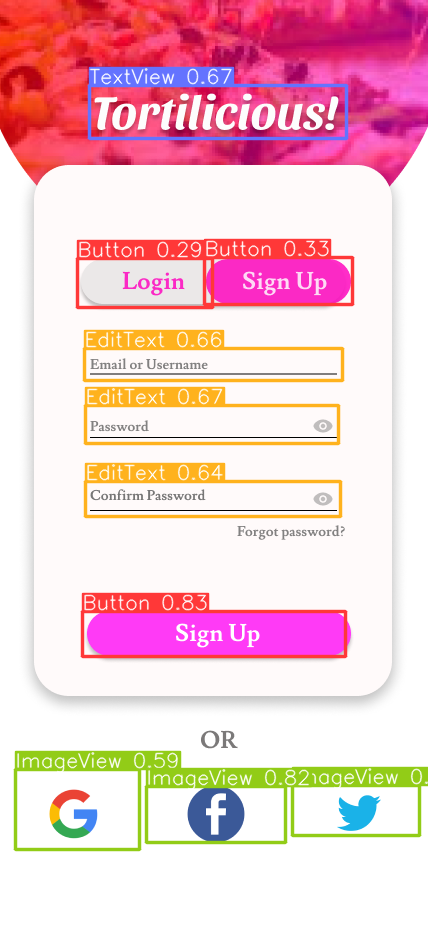

In [ ]:
Image(filename="./runs/detect/predict4/Sign Up Page.png", height=600)

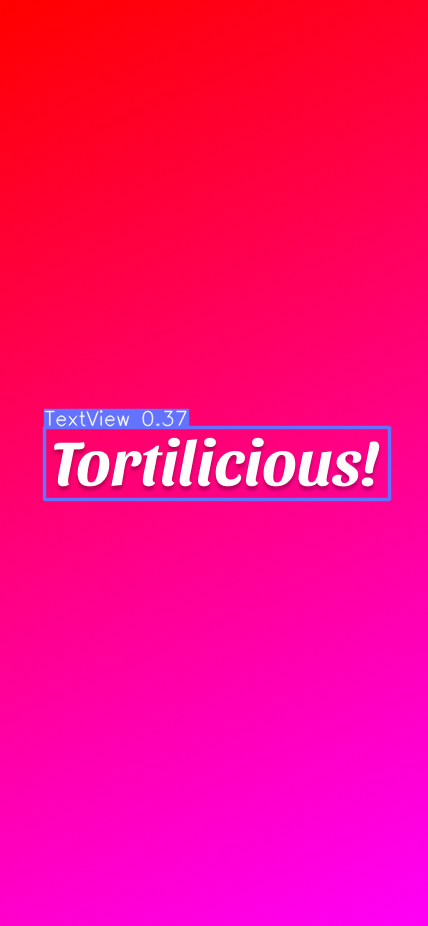

In [ ]:
Image(filename="./runs/detect/predict5/Splash Screen.png", height=600)

In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="nAD7Tl6AbKJueOFIcaqN")
project = rf.workspace("yolo-z8ekd").project("ui-component")
dataset = project.version(2)

project.version(2).deploy(model_type="yolov8", model_path='./runs/detect/train/')